In [1]:
"""
created on 12 Mar 2019

@author: HuanZheng
"""
# 线性回归

'\ncreated on 12 Mar 2019\n\n@author: HuanZheng\n'

# 数据准备

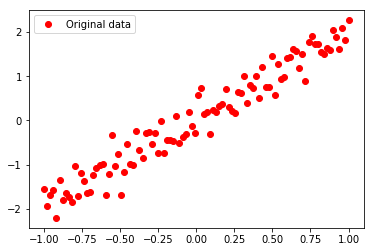

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

train_X = np.linspace(-1, 1, 100)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.3 # y = 2x而且加入了噪声
# 显示模拟数据点
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.legend()
plt.show()

# 搭建模型

In [2]:
# 创建模型
# 占位符
X = tf.placeholder('float')
Y = tf.placeholder('float')
# 模型参数
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')
# 前向结构
z = tf.multiply(X, W) + b

In [3]:
# 反向优化
cost = tf.reduce_mean(tf.square(Y - z))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 迭代训练模型

In [4]:
plotdata = { "batchsize":[], "loss":[] }
def moving_average(a, w=10):
    if len(a) < w: 
        return a[:]    
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]

Epoch: 1 cost= 1.6815367 W= [0.02643399] b= [0.61696786]
Finished
cost= 1.6815367 W= [0.02643399] b= [0.61696786]
Finished
cost= 0.56081426 W= [0.9543038] b= [0.4122967]
Epoch: 3 cost= 0.20747037 W= [1.4519284] b= [0.24097495]
Finished
cost= 0.20747037 W= [1.4519284] b= [0.24097495]
Finished
cost= 0.11248641 W= [1.7083162] b= [0.14513509]
Epoch: 5 cost= 0.08822691 W= [1.8391229] b= [0.09526907]
Finished
cost= 0.08822691 W= [1.8391229] b= [0.09526907]
Finished
cost= 0.082252055 W= [1.9056938] b= [0.06976572]
Epoch: 7 cost= 0.080868214 W= [1.939552] b= [0.05677837]
Finished
cost= 0.080868214 W= [1.939552] b= [0.05677837]
Finished
cost= 0.08059291 W= [1.9567702] b= [0.05017174]
Epoch: 9 cost= 0.08056374 W= [1.9655259] b= [0.04681191]
Finished
cost= 0.08056374 W= [1.9655259] b= [0.04681191]
Finished
cost= 0.08057755 W= [1.9699779] b= [0.04510347]
Epoch: 11 cost= 0.08059199 W= [1.9722412] b= [0.04423486]
Finished
cost= 0.08059199 W= [1.9722412] b= [0.04423486]
Finished
cost= 0.08060125 W= [

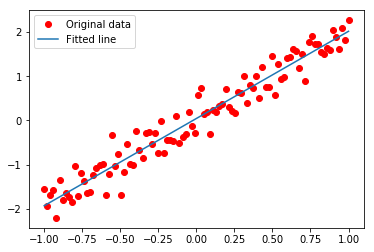

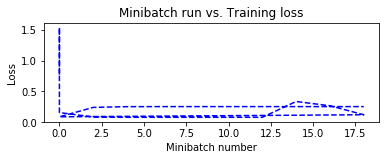

x = 0.2, z =  [0.4382537]


In [13]:
# 初始化所有变量
init = tf.global_variables_initializer()
# 定义参数
train_epochs = 20
display_step = 2
# 启动session
with tf.Session() as sess:
    sess.run(init)
    # 向模型输入数据
    for epoch in range(train_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
        # 显示训练中的详细信息
        if epoch % display_step == 0:
            loss = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
            print('Epoch:', epoch + 1, 'cost=', loss, 'W=', sess.run(W),
                  'b=', sess.run(b))
            if (loss != 'NA'):
                plotdata['batchsize'].append(epoch)
                plotdata['loss'].append(loss)
                
        print('Finished')
        print('cost=', sess.run(cost, feed_dict={X:train_X, Y:train_Y}), 'W=', sess.run(W),
              'b=', sess.run(b))
    
    #图形显示
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    plotdata["avgloss"] = moving_average(plotdata["loss"])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata["batchsize"], plotdata["avgloss"], 'b--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch run vs. Training loss')

    plt.show()
    
    print('x = 0.2, z = ', sess.run(z, feed_dict={X: 0.2}))